# Discussion Notebook: HUC 02070001 given **$x_\text{observed}$**                      from Hydrodata

## Find the total number of hours between the start date and the end date

In [1]:
from datetime import datetime
# define start and end dates
start_date = datetime(2003, 10, 27)
end_date = datetime(2003, 11, 7)

# calculate the difference in hours
time_difference = end_date - start_date
total_hours = time_difference.total_seconds() / 3600

# print the total number of hours 
print(f"Total number of hours: {total_hours}")


Total number of hours: 264.0


## Posterior Distribution: Before Calibrating The Prior Distribution

Here you can find attached the json path for the posterior density estimation before calibrating the prior distribution. However, this file is in my scratch not in my home directory:  
**json_path = '/home/ms6730/mannings_observation_true_value_02070001/hydrogen-sbi/scripts/settings.json**


## Discussion before Calibrating the Prior Distribution

The prior distribution does not adequately capture the behavior of M8, M7, M6, and M4. This is evident from the posterior distribution, where the highest probability density is concentrated at the edges of the domain. Such a pattern suggests that the selected domain is not well-calibrated for these models. To improve the fit, adjustments should be made to the domain's boundaries by expanding the domain. Thus, the left boudry is divided by 4 this time and the upper boundary is multplyed by 4 instead of 2 which was the initial scalor for the first run. 

## Define The Bounds of Each Manning's Value before Calibrating the Prior Distribution

In [2]:
# Define The Manning's Values
M0 = 5.56e-06
M1 = 8.33e-06
M2 = 9.72e-06
M3 = 1.39e-05
M4 = 1.53e-05
M5 = 1.67e-05
M6 = 1.94e-05
M7 = 2.50e-05
M8 = 2.78e-05

# Scaling factor
scalor = 2 

# List of Manning's values
M = [M0, M1, M2, M3, M4, M5, M6, M7, M8]

# Compute min and max ranges for each Manning's value
min_values = []
max_values = []

for value in M:
    min_values.append(value / scalor)  # Compute min range
    max_values.append(value * scalor)  # Compute max range

# Print results
for i, (m, min_val, max_val) in enumerate(zip(M, min_values, max_values)):
    print(f"M{i}: Original = {m:.2e}, Min = {min_val:.2e}, Max = {max_val:.2e}")


M0: Original = 5.56e-06, Min = 2.78e-06, Max = 1.11e-05
M1: Original = 8.33e-06, Min = 4.16e-06, Max = 1.67e-05
M2: Original = 9.72e-06, Min = 4.86e-06, Max = 1.94e-05
M3: Original = 1.39e-05, Min = 6.95e-06, Max = 2.78e-05
M4: Original = 1.53e-05, Min = 7.65e-06, Max = 3.06e-05
M5: Original = 1.67e-05, Min = 8.35e-06, Max = 3.34e-05
M6: Original = 1.94e-05, Min = 9.70e-06, Max = 3.88e-05
M7: Original = 2.50e-05, Min = 1.25e-05, Max = 5.00e-05
M8: Original = 2.78e-05, Min = 1.39e-05, Max = 5.56e-05


## Define New Prior Distribution 

In [3]:
# Define The Manning's Values
M0 = 5.56e-06
M1 = 8.33e-06
M2 = 9.72e-06
M3 = 1.39e-05
M4 = 1.53e-05
M5 = 1.67e-05
M6 = 1.94e-05
M7 = 2.50e-05
M8 = 2.78e-05

# Scaling factor
scalor = 4

# List of Manning's values
M = [M0, M1, M2, M3, M4, M5, M6, M7, M8]

# Compute min and max ranges for each Manning's value
min_values = []
max_values = []

for value in M:
    min_values.append(value / scalor)  # Compute min range
    max_values.append(value * scalor)  # Compute max range

# Print results
for i, (m, min_val, max_val) in enumerate(zip(M, min_values, max_values)):
    print(f"M{i}: Original = {m:.2e}, Min = {min_val:.2e}, Max = {max_val:.2e}")


M0: Original = 5.56e-06, Min = 1.39e-06, Max = 2.22e-05
M1: Original = 8.33e-06, Min = 2.08e-06, Max = 3.33e-05
M2: Original = 9.72e-06, Min = 2.43e-06, Max = 3.89e-05
M3: Original = 1.39e-05, Min = 3.48e-06, Max = 5.56e-05
M4: Original = 1.53e-05, Min = 3.82e-06, Max = 6.12e-05
M5: Original = 1.67e-05, Min = 4.17e-06, Max = 6.68e-05
M6: Original = 1.94e-05, Min = 4.85e-06, Max = 7.76e-05
M7: Original = 2.50e-05, Min = 6.25e-06, Max = 1.00e-04
M8: Original = 2.78e-05, Min = 6.95e-06, Max = 1.11e-04


## Discusion after calibrating the Prior distributiom

In [4]:
# Paths and base settings
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework"
runname = "sinnemahoning"

## Plotting Spatial Manning's Distribution 

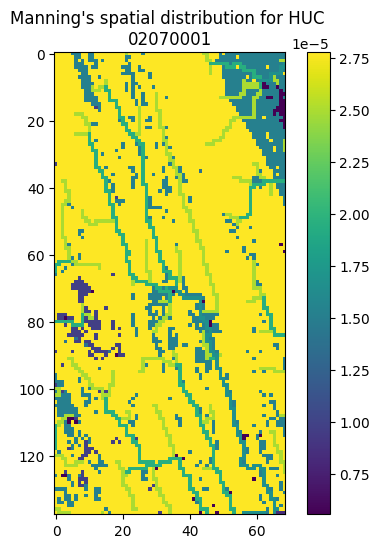

In [5]:
from parflow.tools.io import read_pfb
import matplotlib.pyplot as plt


# define the path for the Manning's pfb file for the baseline run on January 20 and February 8 
file1 = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs/sinnemahoning/mannings.pfb"

# read the file
file1_data = read_pfb(file1)

# visual comparison
plt.figure(figsize=(12, 6))

# Visualization for Manning's distribution for the baseline run on February 8 for a duration of two weeks
plt.subplot(1, 2, 1)
plt.imshow(file1_data.squeeze(), cmap='viridis')
plt.title("Manning's spatial distribution for HUC \n02070001")
plt.colorbar()

# Display the figure
plt.show()

## Coordinates of Gage Stations on the HUC Domain 02070001

In [6]:
import pandas as pd

# Load observation metadata
obs_metadata_path = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs/sinnemahoning/streamflow_daily_metadf.csv"

# Read the CSV file
obs_metadata_df = pd.read_csv(obs_metadata_path)

# Extract domain_i and domain_j columns
domain_i_j_df = obs_metadata_df[["domain_i", "domain_j"]]

# Print first few rows to inspect
print(domain_i_j_df)



   domain_i  domain_j
0        26        30
1        27        69
2        30        70
3        33        29
4        48        73
5        63       130


## Plotting the elevation for the HUC domain 02070001

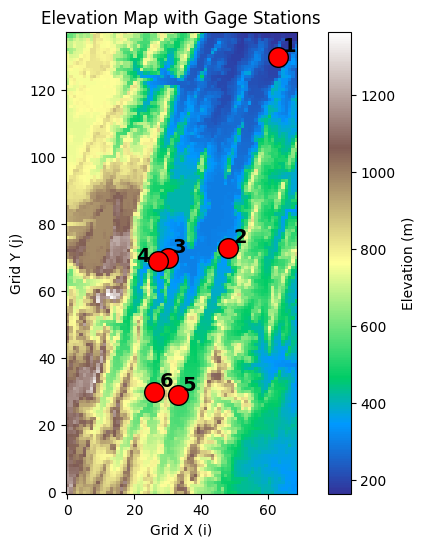

In [7]:
import hf_hydrodata as hf
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
huc_list = ["02070001"]
ij_bounds = [3662, 1656, 3731, 1794]

# Get elevation data
data = hf.get_gridded_data({
    "variable": "elevation", 
    "grid": "conus2", 
    "grid_bounds": ij_bounds
})

# Extract elevation array
elevation = data  

# Gage station coordinates (estimated visually from photo)
domain_i = [63, 48, 30, 27, 33, 26]  # Replace with actual values
domain_j = [130, 73, 70, 69, 29, 30] # Replace with actual values

gage_labels = ['1', '2', '3', '4', '5', '6']

# Plot elevation and scatter in the same figure
fig, ax = plt.subplots(figsize=(8, 6))

# Elevation background
im = ax.imshow(elevation, cmap="terrain", origin="lower")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Elevation (m)")

# Overlay scatter points
ax.scatter(domain_i, domain_j, c="red", s=200, edgecolors="black", marker="o", zorder=3)

# Add labels next to points
for i, label in enumerate(gage_labels):
    # Shift label "2" to the left
    if label == '4':
        ax.text(domain_i[i] - 2.5, domain_j[i], label, color='black', fontsize=14, weight='bold', ha='right')
    else:
        ax.text(domain_i[i] + 1.5, domain_j[i] + 1.5, label, color='black', fontsize=14, weight='bold')

# Title and axis labels
ax.set_title("Elevation Map with Gage Stations")
ax.set_xlabel("Grid X (i)")
ax.set_ylabel("Grid Y (j)")

# Save the plot
# figure_path = '/home/ms6730/results_SBI/results_plots/elevation_map_with_stations.png'
# plt.savefig(figure_path, dpi=300, bbox_inches='tight')
plt.show()


## Spatial manning's ditribution along the elevation to determine the streamflow 

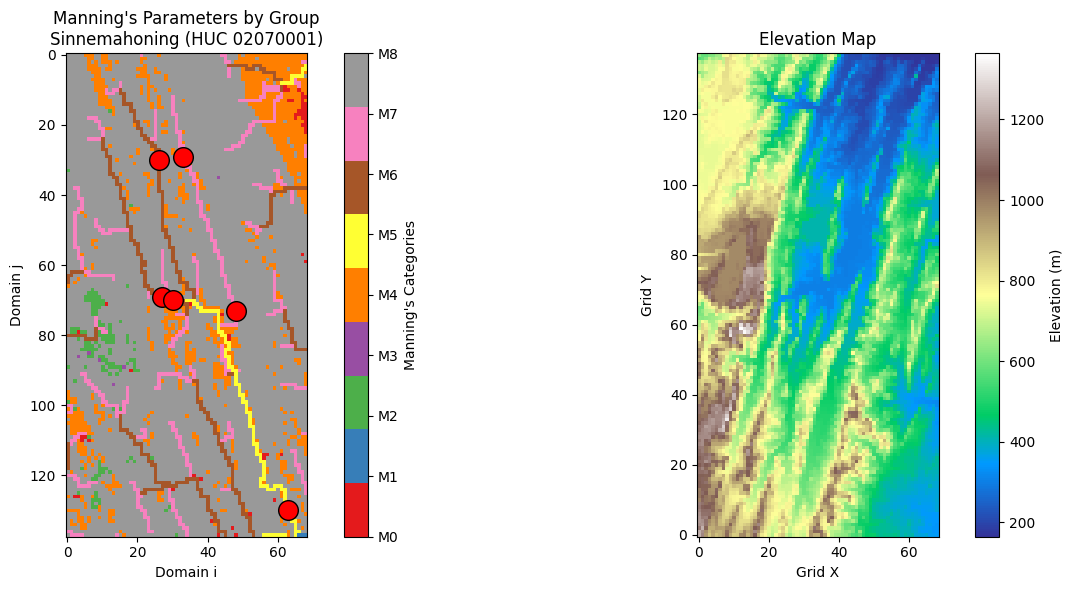

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Paths and base settings
orig_mannings = read_pfb(f"{base_dir}/outputs/{runname}/mannings.pfb").squeeze()

# Manning's categories and labels
new_name_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
category_labels = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']

# Read filtered Manning's values
orig_vals_path = f"{base_dir}/{runname}_filtered_orig_vals.csv"
filtered_df = pd.read_csv(orig_vals_path)

# Convert filtered values to tensor
orig_mannings_tensor = torch.tensor(filtered_df.iloc[0].to_numpy(), dtype=torch.float)

# Create a copy for mapping new categories
new_mannings = orig_mannings.copy()

# Assign new Manning's categories
for col, new_name in zip(filtered_df.columns, new_name_list):
    orig_val = filtered_df[col][0]
    mask = np.isclose(new_mannings, orig_val) 
    new_mannings[mask] = new_name

# Load observation metadata
obs_metadata_path = f"{base_dir}/outputs/{runname}/streamflow_daily_metadf.csv"
obs_metadata_df = pd.read_csv(obs_metadata_path)

# Extract gage station coordinates
domain_i = obs_metadata_df["domain_i"]
domain_j = obs_metadata_df["domain_j"]

# Gage station labels
gage_labels = ["01605500", "01606000", "01606500", "01607500", "01608000", "01608500"]

# Create subplots (Manning's Map + Elevation)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Manning's grid in the first subplot
cmap = plt.get_cmap('Set1', len(new_name_list))
im = axes[0].imshow(new_mannings, cmap=cmap)
cbar = plt.colorbar(im, ax=axes[0], ticks=np.arange(len(new_name_list)))
cbar.set_label("Manning's Categories")
cbar.set_ticklabels(category_labels)

# Scatter plot for gage stations
axes[0].scatter(
    domain_i, 
    domain_j, 
    c="red",  
    s=200,  
    edgecolors="black",  
    marker="o",  
    zorder=3  
)

axes[0].set_title("Manning's Parameters by Group\nSinnemahoning (HUC 02070001)")
axes[0].set_xlabel("Domain i")
axes[0].set_ylabel("Domain j")

# Plot Elevation in the second subplot
elev_plot = axes[1].imshow(elevation, cmap="terrain", origin="lower")
axes[1].set_title("Elevation Map")
axes[1].set_xlabel("Grid X")
axes[1].set_ylabel("Grid Y")
cbar2 = plt.colorbar(elev_plot, ax=axes[1])
cbar2.set_label("Elevation (m)")

plt.tight_layout()


#Save the table 
# figure_path = '/home/ms6730/results_SBI/results_plots/elevation_map_mannings.png'
# plt.savefig(figure_path, dpi=300, bbox_inches='tight')

plt.show()


## Proportion of each Manning's  category in a table 

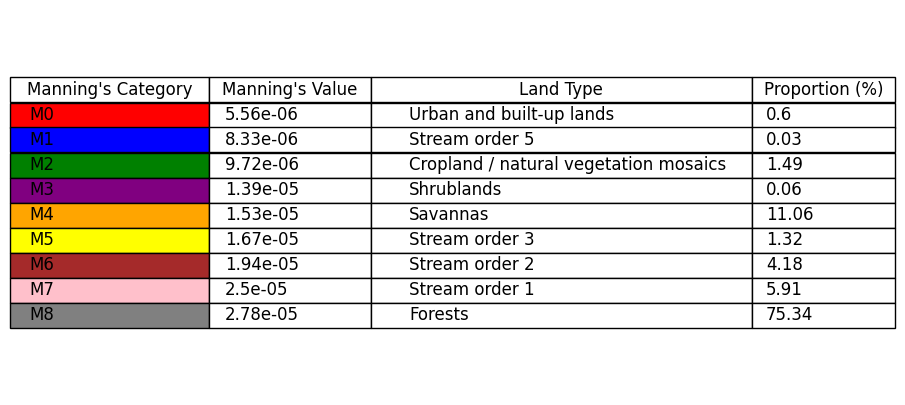

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Placeholder: Generate random Manning's data for visualization
orig_mannings = np.random.rand(100, 100)  # Replace with actual Manning's data

# Manning's categories and labels
new_name_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
category_labels = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']

# Define Manning's values, counts, land types, and colors
manning_values = [
    5.56e-06, 8.33e-06, 9.72e-06, 
    1.39e-05, 1.53e-05, 1.67e-05, 
    1.94e-05, 2.50e-05, 2.78e-05
]

counts = [57, 3, 142, 6, 1053, 126, 398, 563, 7174]

land_types = [
    "Urban and built-up lands", "Stream order 5", "Cropland / natural vegetation mosaics",
    "Shrublands", "Savannas", "Stream order 3", "Stream order 2", 
    "Stream order 1", "Forests"
]

manning_labels = ["M0", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"]
manning_colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown", "pink", "gray"]

# Calculate proportions
total_count = sum(counts)
proportions = [round((count / total_count) * 100, 2) for count in counts]

# Create a DataFrame for structured representation
df_manning = pd.DataFrame({
    "Manning's Category": manning_labels,
    "Manning's Value": manning_values,
    "Land Type": land_types,
    "Proportion (%)": proportions
})

# Create a separate figure for the Manning's Table with a better size
fig_table, ax_table = plt.subplots(figsize=(10, 5))
ax_table.axis("tight")
ax_table.axis("off")

# Create the table with adjusted column width
table = ax_table.table(cellText=df_manning.values, colLabels=df_manning.columns, cellLoc="left", loc="center")

# Apply colors to the "Manning's Category" column for better distinction
for i, color in enumerate(manning_colors):
    table[(i + 1, 0)].set_facecolor(color)  # Color the background of the "Manning's Category" column

# Improve table layout
table.auto_set_font_size(False)
table.set_fontsize(12)  # Slightly larger font for readability
table.scale(1.5, 1.5)  # Scale the table for better spacing
table.auto_set_column_width([0, 1, 2, 3, 4])  # Adjust column width

# Define save path
# figure_path = '/home/ms6730/results_SBI/results_plots/manning_table.png'

# Save the figure before showing it
# plt.savefig(figure_path, dpi=300, bbox_inches='tight')

# Show the table
plt.show()


## Plotting Posterior Density Estimation

In [66]:
import os
import pickle
import numpy as np
import pandas as pd
from sbi.inference import SNPE
from sbi.utils import get_density_thresholder, RestrictedPrior
from sbi.analysis import pairplot
import torch
import json
import matplotlib.pyplot as plt
from parflow.tools.io import read_pfb, read_clm
import subsettools as st
import hf_hydrodata as hf
import random
import glob
import matplotlib.dates as mdates
#read in variables from the json file
json_path = '/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/hydrogen-sbi/scripts/settings.json' 
with open(json_path, 'r') as file:
    settings = json.load(file)
    
base_dir = settings['base_dir']
grid = settings['grid']
huc = settings['huc']
temporal_resolution = settings['temporal_resolution']
runname=settings['runname']
variable_list = settings['variable_list']
num_sims = settings['num_sims']
ens_num=settings['ens_num']
num_samples = settings['num_samples']
quantile = settings['quantile']
#obsv_path=settings['observation_path']
mannings_name = settings['base_mannings_file']
seed=settings['random_seed']

metadata_path=f'{base_dir}/outputs/{runname}/streamflow_daily_metadf.csv'


#set the random seed
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

## Posterior Density Estimation for $M_0$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


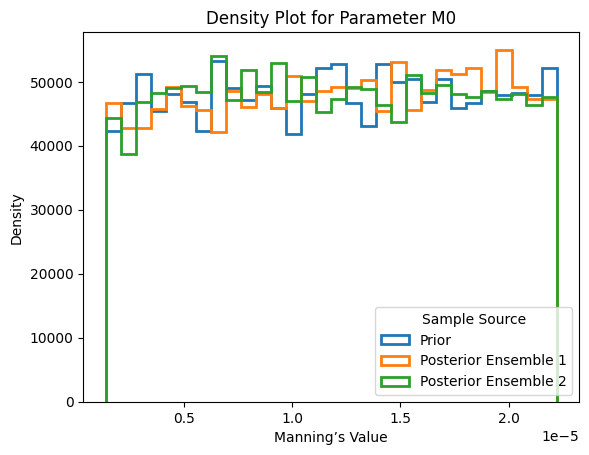

Posterior Ensemble 1: 1.9789864381891675e-05
Posterior Ensemble 2: 6.596392267965712e-06


In [68]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities

torch.manual_seed(42)  # Set fixed random seed for reproducibility


save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

for j in range(0, 1):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_1$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


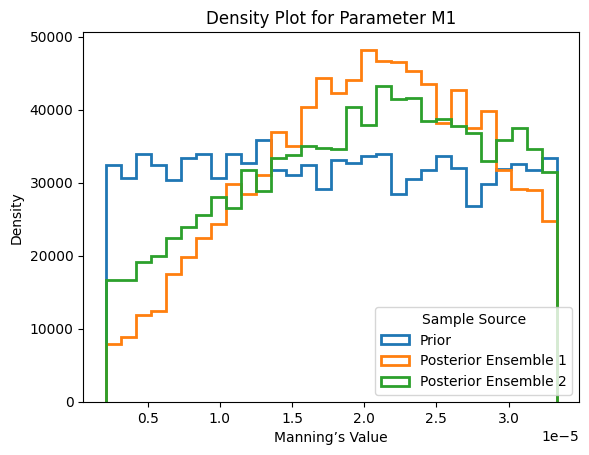

Posterior Ensemble 1: 2.0314395442255773e-05
Posterior Ensemble 2: 2.135419344995171e-05


In [70]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities

torch.manual_seed(42)  # Set fixed random seed for reproducibility
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

for j in range(1, 2):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_2$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


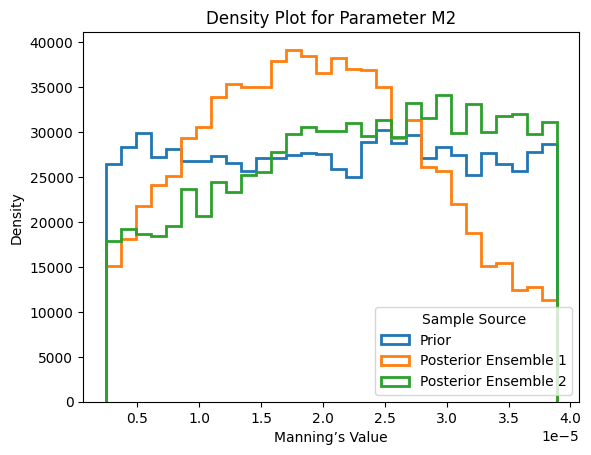

Posterior Ensemble 1: 1.7621798178879544e-05
Posterior Ensemble 2: 2.9776139854220673e-05


In [71]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(2, 3):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_3$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


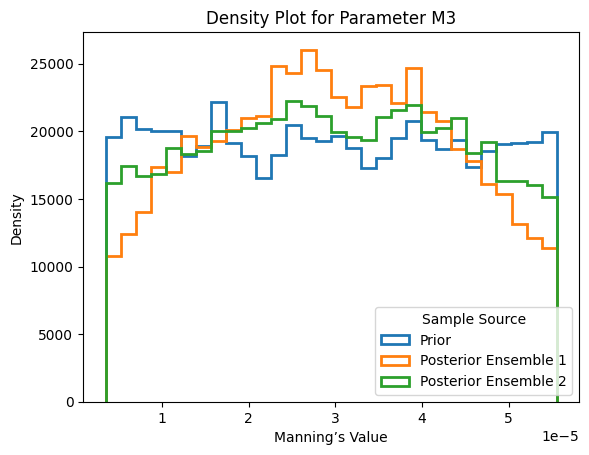

Posterior Ensemble 1: 2.690775363589637e-05
Posterior Ensemble 2: 2.5173034373437986e-05


In [72]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(3, 4):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_4$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


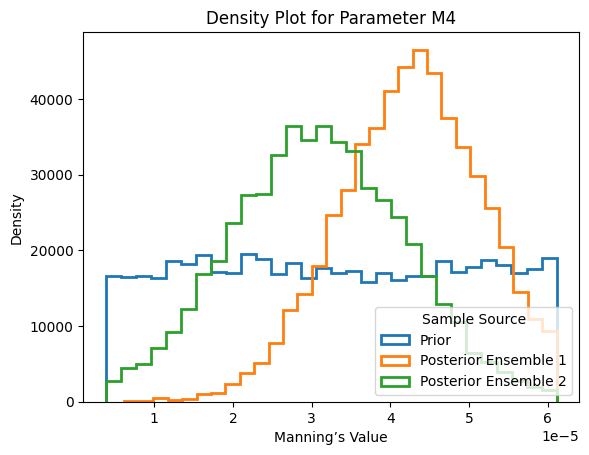

Posterior Ensemble 1: 4.3724881834350526e-05
Posterior Ensemble 2: 2.7710309950634837e-05


In [73]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(4, 5):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_5$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


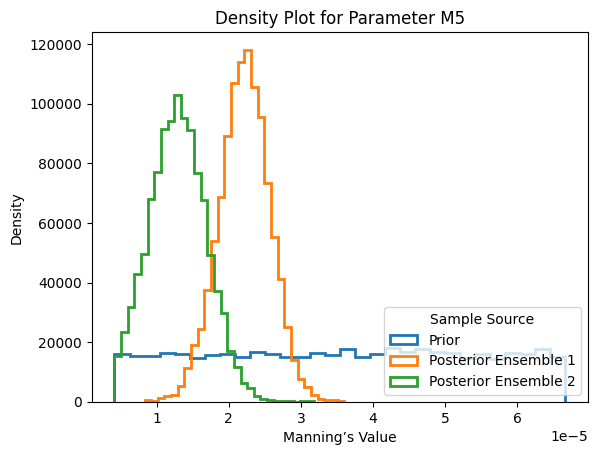

Posterior Ensemble 1: 2.2648346202913672e-05
Posterior Ensemble 2: 1.2903540664410684e-05


In [74]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(5, 6):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_6$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


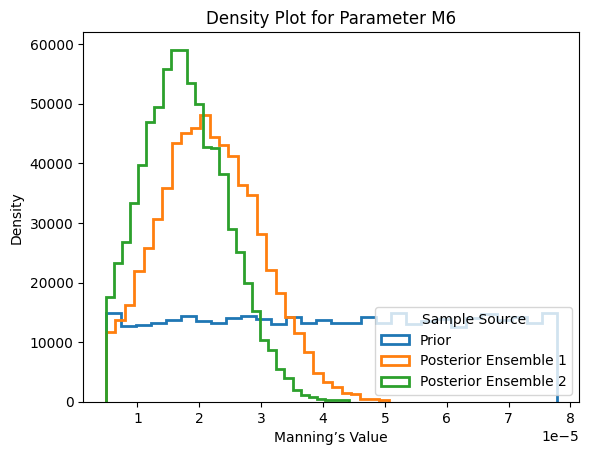

Posterior Ensemble 1: 2.088804467348382e-05
Posterior Ensemble 2: 1.6027439414756373e-05


In [75]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'
torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(6, 7):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_7$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


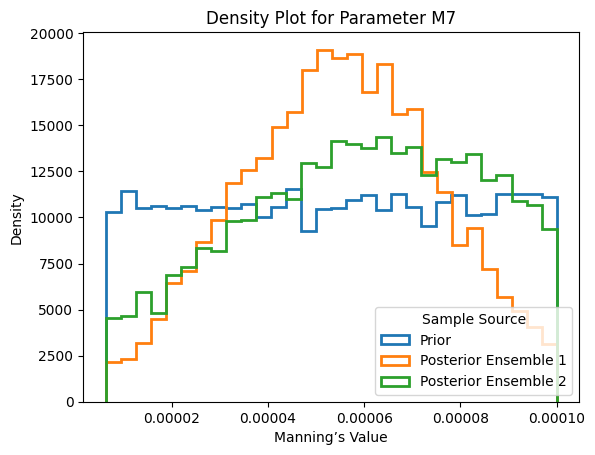

Posterior Ensemble 1: 5.164242975297384e-05
Posterior Ensemble 2: 6.408133776858449e-05


In [76]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(7, 8):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Posterior Density Estimation for $M_8$

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


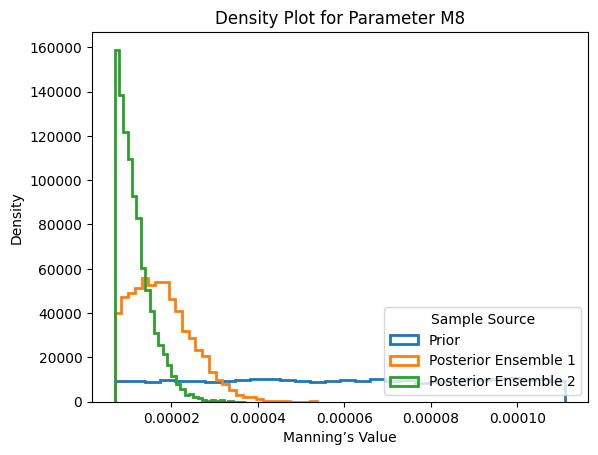

Posterior Ensemble 1: 1.39547682920238e-05
Posterior Ensemble 2: 7.450239536410663e-06


In [77]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities
save_dir = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots'

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(8, 9):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title(f'Density Plot for Parameter M{j}')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{save_dir}/Density_Plot_for_M{j}.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Noise Distrubtion 

Loading prior...


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    8926 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


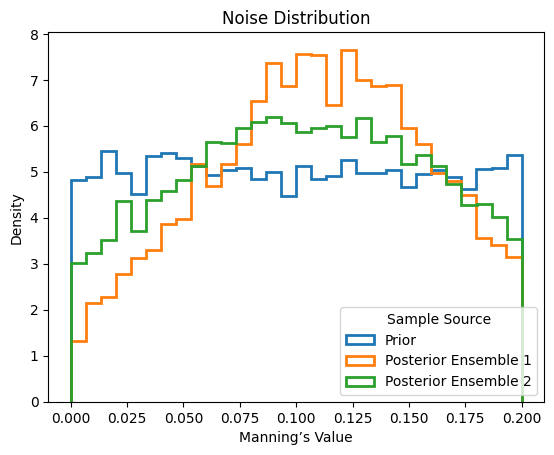

Posterior Ensemble 1: 0.12332794070243835
Posterior Ensemble 2: 0.09003028273582458


In [43]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

ens_num = 2  
highest_density_mannings = {"Posterior": []}  # Dictionary to store the Manning's values with the highest densities

torch.manual_seed(42)  # Set fixed random seed for reproducibility

for j in range(9, 10):  
    # Load the prior distribution
    with open(f"{base_dir}/{runname}_prior.pkl", "rb") as fp:
        print("Loading prior...")
        prior = pickle.load(fp)

    # Sample prior
    torch.manual_seed(42)  # Ensure same sampling each time
    samples_prior = prior.sample((10000,))
    prior_values = samples_prior[:, j].numpy()
    
    # Plot prior
    plt.hist(
        prior_values, 
        bins=30, 
        density=True, 
        histtype='step', 
        linewidth=2, 
        label="Prior"
    )

    # Plot posterior distributions
    for i in range(ens_num):
        with open(f"{base_dir}/{runname}_posterior_{i}.pkl", "rb") as fp:
            posterior = pickle.load(fp)

        label = f"Posterior Ensemble {i+1}"
        
        # Sample posterior
        torch.manual_seed(42)  # Ensures reproducibility in sampling
        samples_posterior = posterior.sample((10000,))
        posterior_values = samples_posterior[:, j].numpy()

        # Compute histogram for posterior
        density_posterior, bins_posterior = np.histogram(posterior_values, bins=30, density=True)

        # Find the bin with the highest density
        max_density_index_posterior = np.argmax(density_posterior)
        highest_density_mannings["Posterior"].append(
            (i, (bins_posterior[max_density_index_posterior] + bins_posterior[max_density_index_posterior + 1]) / 2)
        )

        # Plot posterior
        plt.hist(
            posterior_values, 
            bins=30, 
            density=True, 
            histtype='step', 
            linewidth=2, 
            label=label
        )

    # Customize and save the plot
    plt.title('Noise Distribution')
    plt.xlabel('Manning’s Value')
    plt.ylabel('Density')
    plt.legend(loc='lower right', title='Sample Source')
    plt.savefig(f'{base_dir}/plots/param{j}_combined_hist.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()
    plt.close()

# Print the Manning’s values with the highest density   
for i, value in highest_density_mannings["Posterior"]:    
    print(f"Posterior Ensemble {i+1}: {value}")


## Debugging and double check

In [13]:
import numpy as np
from parflow.tools.io import read_pfb  # If using ParFlow tools

# Path to the PFB file
pfb_file = "/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning_0_0/mannings_0.pfb"

# Read the PFB file (returns a NumPy array)
data_array = read_pfb(pfb_file).squeeze()  # Remove singleton dimensions if needed

# Get unique values
unique_values = np.unique(data_array)

# Print the unique values
print("Unique values in the PFB file:", unique_values)


Unique values in the PFB file: [1.3954e-05 1.7621e-05 1.9789e-05 2.0314e-05 2.0888e-05 2.2648e-05
 2.6907e-05 4.3724e-05 5.1642e-05]


In [14]:
from parflow.tools.io import read_pfb
import numpy as np

# Path to the saved Manning's PFB file
pfb_file_path = "/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning_0_0/mannings_0.pfb"

# Read the PFB file
manning_data = read_pfb(pfb_file_path)

# Print unique values
print("\nUnique values in the saved Manning's PFB file:")
print(np.unique(manning_data))



Unique values in the saved Manning's PFB file:
[1.3954e-05 1.7621e-05 1.9789e-05 2.0314e-05 2.0888e-05 2.2648e-05
 2.6907e-05 4.3724e-05 5.1642e-05]


In [16]:
from parflow.tools.io import read_pfb
import numpy as np

# Path to the saved Manning's PFB file
pfb_file_path = "/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning_0_0/mannings_0.pfb"

# Read the PFB file
manning_data = read_pfb(pfb_file_path)

# Print unique values
print("\nUnique values in the saved Manning's PFB file:")
print(np.unique(manning_data))



Unique values in the saved Manning's PFB file:
[1.3954e-05 1.7621e-05 1.9789e-05 2.0314e-05 2.0888e-05 2.2648e-05
 2.6907e-05 4.3724e-05 5.1642e-05]


## Define The HUC domain 

In [17]:
import subsettools as st
ij_huc_bounds, mask = st.define_huc_domain(hucs=["02070001"], grid="conus2")
print(f"bounding box: {ij_huc_bounds}")
i_min = ij_huc_bounds[0]
j_min = ij_huc_bounds[1]
i_max = ij_huc_bounds[2]
j_max = ij_huc_bounds[3]
print (" dx=", i_max - i_min +1)
print ("dy=", j_max - j_min +1)

bounding box: (3662, 1656, 3731, 1794)
 dx= 70
dy= 139


## Perform Parallel Computation : Splitting Cores

In [18]:
from itertools import product

#### USER FILLS THESE OUT ####
# VERDE
CoresPerNode = 64 # on your system, how many cores per node do you have? 
R = 1 # typically, this is set to 1 
MinCores = 2  # what is the minimum amt of cores that you want to use 
MaxCores = 64 # 512 # what is the maximum amt of cores that you want to use 
nx = 70 # nx of your domain's bounding box
ny = 139 # ny of your domain's bounding box 
DiffThresh = 10 # the difference between nx/P and ny/Q that is acceptable...the lower the better! 


def solve_pq(R, MaxCores, nx, ny, DiffThresh):


    # Generate all possible combinations for P, Q
    possible_values = range(1, MaxCores + 1)
    combinations = product(possible_values, repeat=2)

    # Check conditions for each combination
    for P, Q in combinations:
        if (P * Q * R) <= MaxCores and (P * Q * R) >= MinCores and abs(nx/P - ny/Q) < DiffThresh and (P*Q*R) % CoresPerNode == 0:
            print(P*Q*R,"% 128 = ",(P*Q*R) % CoresPerNode)
            return P, Q, R

    # If no valid combination is found
    return None


result = solve_pq(R, MaxCores, nx, ny, DiffThresh)

if result:
    P, Q, R = result
    print(f"\nSolution found: P = {P}, Q = {Q}, R = {R}\n")
    print("Number of Cores:",P*Q*R)
    print("nx/P:",nx/P)
    print("ny/Q:",ny/Q)
else:
    print("No solution found.")

64 % 128 =  0

Solution found: P = 4, Q = 16, R = 1

Number of Cores: 64
nx/P: 17.5
ny/Q: 8.6875


## Spatial Manning's distribution for the CONUS 2 Domain

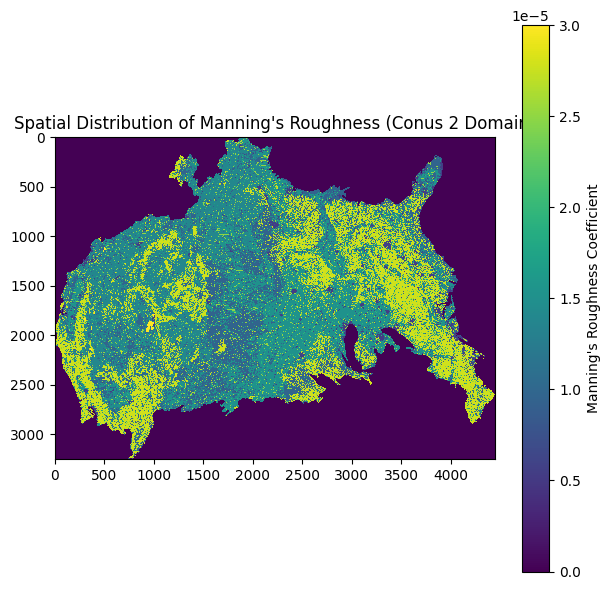

In [19]:
import hf_hydrodata as hf
import matplotlib.pyplot as plt

# Get gridded Manning's map
filters = {"dataset": "conus2_domain", "variable": "mannings"}
mannings_map = hf.get_gridded_data(filters)

# Plotting the full Manning's map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mannings_map, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Manning's Roughness Coefficient")
plt.title("Spatial Distribution of Manning's Roughness (Conus 2 Domain)")

# # Save the figure
# figure_path = '/home/ms6730/mannings_observation_true_value_02070001/results_plots/manning_distribution_full_conus.png'
# plt.savefig(figure_path, dpi=300, bbox_inches='tight')

# Display The Figure 
plt.tight_layout()
plt.show()


## Plotting Spatial Manning's distribution with each gage station 

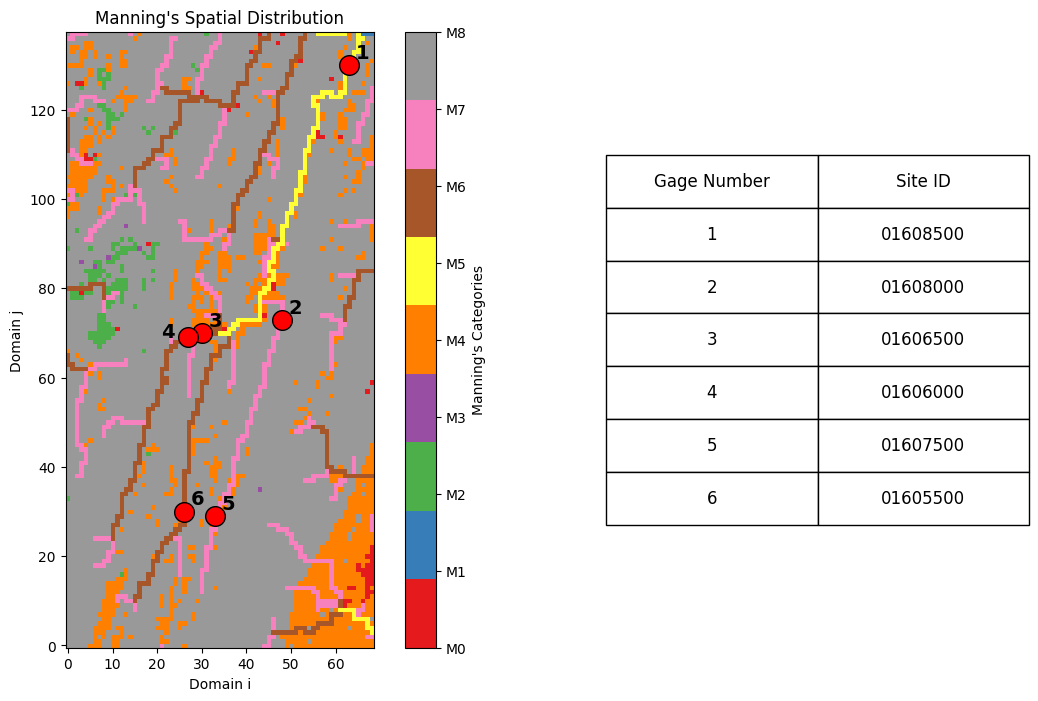

In [28]:
# Import Libraries
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from parflow.tools.io import read_pfb

# Paths and base settings
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework"
runname = "sinnemahoning"

# Load Manning's PFB
orig_mannings = read_pfb(f"{base_dir}/outputs/{runname}/mannings.pfb").squeeze()

# Manning's categories and labels
new_name_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
category_labels = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']

# Read filtered Manning's values
orig_vals_path = f"{base_dir}/{runname}_filtered_orig_vals.csv"
filtered_df = pd.read_csv(orig_vals_path)
orig_mannings_tensor = torch.tensor(filtered_df.iloc[0].to_numpy(), dtype=torch.float)
new_mannings = orig_mannings.copy()

# Remap Manning's values to category indices
for col, new_name in zip(filtered_df.columns, new_name_list):
    orig_val = filtered_df[col][0]
    mask = np.isclose(new_mannings, orig_val)
    new_mannings[mask] = new_name

# Site ID mapping (as per your image)
gage_numbers = ['1', '2', '3', '4', '5', '6']
site_ids = ['01608500', '01608000', '01606500', '01606000', '01607500', '01605500']

# Manually estimated coordinates from your image (Domain i, Domain j)
# These are approximated based on visual positions in your photo
label_coords = [
    ('1', 63, 130),  # Top right
    ('2', 48, 73),   # Left center
    ('3', 30, 70),   # Mid right
    ('4', 27, 69),   # Lower mid
    ('5', 33, 29),   # Slightly below center
    ('6', 26, 30),   # Bottom left
]

# Create side-by-side figure
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.2)

# Left: Manning's spatial distribution
ax_map = plt.subplot(gs[0])
cmap = plt.get_cmap('Set1', len(new_name_list))
im = ax_map.imshow(new_mannings, cmap=cmap, origin="lower")
cbar = plt.colorbar(im, ax=ax_map, ticks=np.arange(len(new_name_list)))
cbar.set_label("Manning's Categories")
cbar.set_ticklabels(category_labels)

# Plot red dots + black numbers at visually estimated positions
for label, i, j in label_coords:
    ax_map.scatter(i, j, color='red', edgecolors='black', s=200, zorder=3)
    if label == '4':
        ax_map.text(i - 3, j, label, color='black', fontsize=14, weight='bold', ha='right')
    else:
        ax_map.text(i + 1.5, j + 1.5, label, color='black', fontsize=14, weight='bold')

ax_map.set_title("Manning's Spatial Distribution")
ax_map.set_xlabel("Domain i")
ax_map.set_ylabel("Domain j")

# Right: Table with gage numbers and site IDs
ax_table = plt.subplot(gs[1])
ax_table.axis('off')
table_data = list(zip(gage_numbers, site_ids))
table = ax_table.table(
    cellText=table_data,
    colLabels=["Gage Number", "Site ID"],
    loc='center',
    cellLoc='center',
    colLoc='center',
    bbox=[0.1, 0.2, 2.0, 0.6]
)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Save the figure
figure_path = '/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/mannings_spatial_distribution'
plt.savefig(figure_path, dpi=300, bbox_inches='tight')
plt.show()


### Plotting Hydrograph for Each Gage Station 

### Ensemble 1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Load the CSV files
df1 = pd.read_csv('/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning/streamflow_daily_df.csv', 
                  parse_dates=True, index_col='date')
df2 = pd.read_csv('/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning_0_0/streamflow_daily_pfsim.csv', 
                  parse_dates=True, index_col='date')
df3 = pd.read_csv('/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning/streamflow_daily_pfsim.csv', 
                  parse_dates=True, index_col='date')  # baseline simulation

# Ensure common columns
common_columns = df1.columns.intersection(df2.columns)

# Directory for saving plots
save_dir = "/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Loop through each column and create separate plots
for i, column in enumerate(common_columns):
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot the observed and simulated data
    ax.plot(df1.index, df1[column], label='Observed', color='black')
    ax.plot(df2.index, df2[column], label='Simulated', linestyle='--', color='blue')
    ax.plot(df3.index, df3[column], label='Baseline Simulation', linestyle=':', color='red')

    ax.set_title(f'Daily Mean Streamflow at Gage {column} Over 2002WY')
    ax.set_ylabel('Streamflow (cfs)')
    ax.legend()

    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.tick_params(axis='x', which='both', labelsize=10)

    # Adjust layout
    fig.tight_layout()

    # Save figure
    figure_path = f"{save_dir}/streamflow_ensemble1_{column}.png"
    fig.savefig(figure_path, dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close to save memory

    print(f"Saved: {figure_path}")

print(f"Finished saving {len(common_columns)} plots to {save_dir}")


Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble1_01605500.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble1_01606000.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble1_01606500.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble1_01607500.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble1_01608000.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble1_01608500.png
Finished saving 6 plots to /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots


### Ensemble 2 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Load the CSV files
df1 = pd.read_csv('/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning/streamflow_daily_df.csv', 
                  parse_dates=True, index_col='date')
df4 = pd.read_csv('/home/ms6730/results_SBI_02070001_observed_hydrodata/plots_finding_notebook_excel_sheet/parflow_streamflow_ensemble1_prior_distribution.csv', 
                  parse_dates=True, index_col='date')  # ensemble simulation
df3 = pd.read_csv('/home/ms6730/results_SBI_02070001_observed_hydrodata/hydrograph_posterior_output_code/sbi_framework/outputs/sinnemahoning/streamflow_daily_pfsim.csv', 
                  parse_dates=True, index_col='date')  # baseline simulation

# Find common columns between observed and ensemble sim
common_columns = df1.columns.intersection(df4.columns)

# Directory for saving plots
save_dir = "/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Loop through each column and create separate plots
for i, column in enumerate(common_columns):
    fig, ax = plt.subplots(figsize=(10, 4))  # New figure for each plot

    # Plot each dataset with clear labeling and style
    ax.plot(df1.index, df1[column], label='Observed', color='black')
    ax.plot(df4.index, df4[column], label='Ensemble Simulation', linestyle='--', color='blue')
    ax.plot(df3.index, df3[column], label='Baseline Simulation', linestyle=':', color='red')

    ax.set_title(f'Daily Mean Streamflow at Gage {column} Over 2002WY')
    ax.set_ylabel('Streamflow (cfs)')
    ax.legend()

    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.tick_params(axis='x', which='both', labelsize=10)

    # Adjust layout
    fig.tight_layout()

    # Save each plot separately
    figure_path = f"{save_dir}/streamflow_ensemble2_{column}.png"
    fig.savefig(figure_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

    print(f"Saved: {figure_path}")

print(f"Finished saving {len(common_columns)} plots in {save_dir}")


Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble2_01605500.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble2_01606000.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble2_01606500.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble2_01607500.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble2_01608000.png
Saved: /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/streamflow_ensemble2_01608500.png
Finished saving 6 plots in /home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots


## Hydrograph Ensemble 1: 01605500

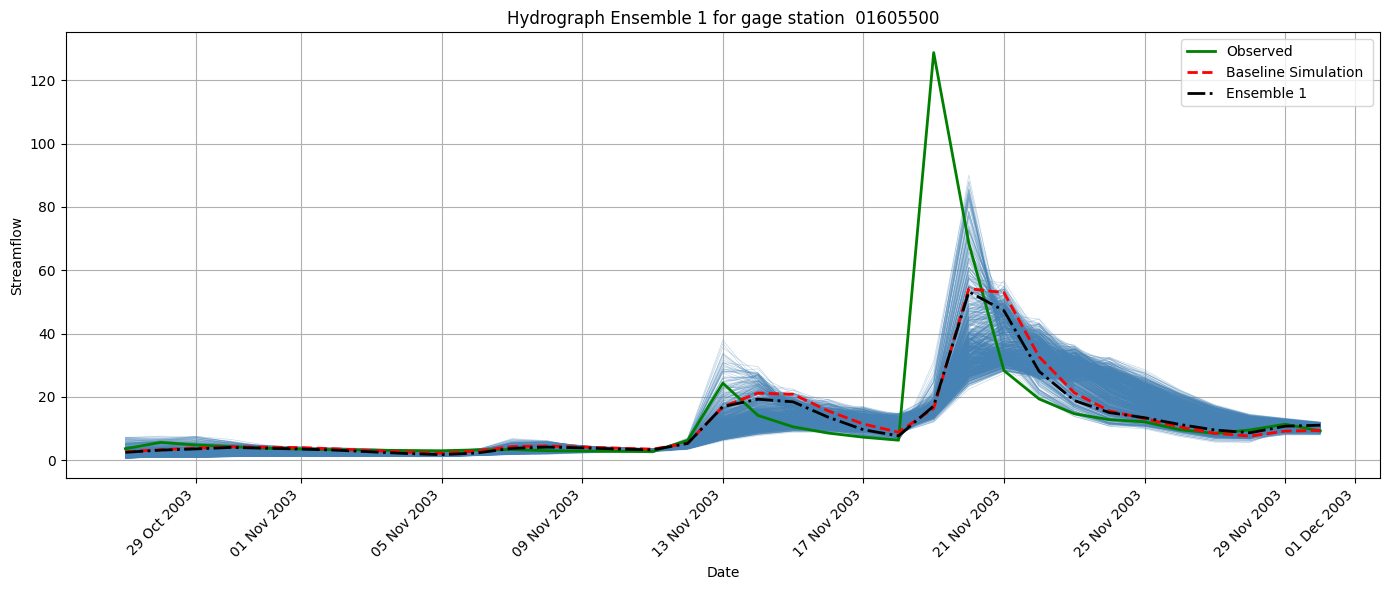

In [51]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01605500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_0_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])


# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df2.columns:
    plt.plot(df2.index, df2[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 1 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 1 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)


# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble1_01605500.png', dpi=300, bbox_inches='tight')

plt.show()


## Hydrograph Ensemble 1: 01606000

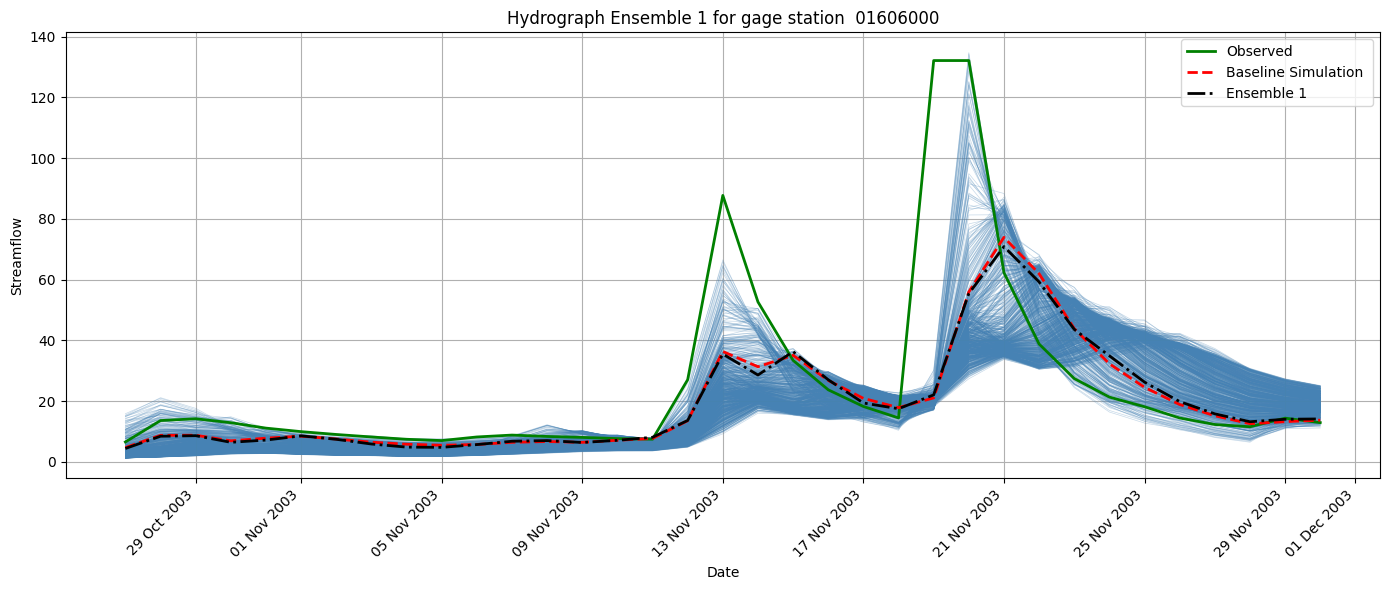

In [52]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01606000"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_0_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])


# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df2.columns:
    plt.plot(df2.index, df2[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 1 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 1 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble1_01606000.png', dpi=300, bbox_inches='tight')

plt.show() 



## Hydrograph Ensemble 1: 01606500

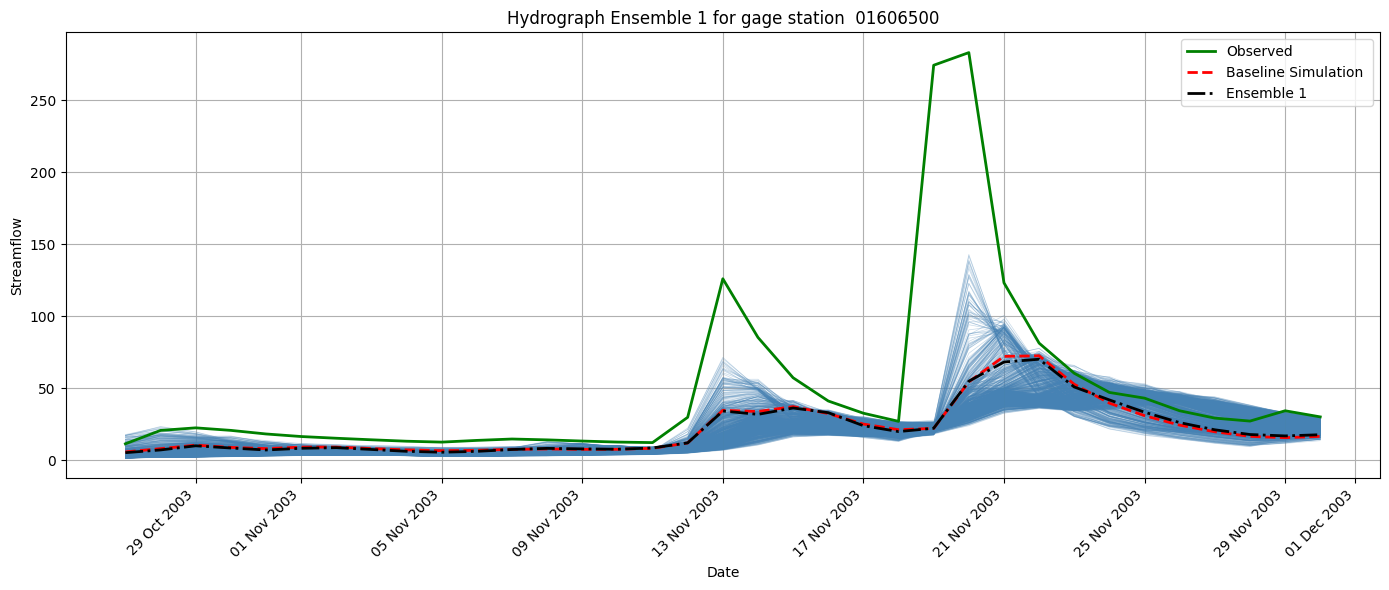

In [53]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01606500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_0_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df2.columns:
    plt.plot(df2.index, df2[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 1 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 1 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble1_01606500.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 1: 01607500

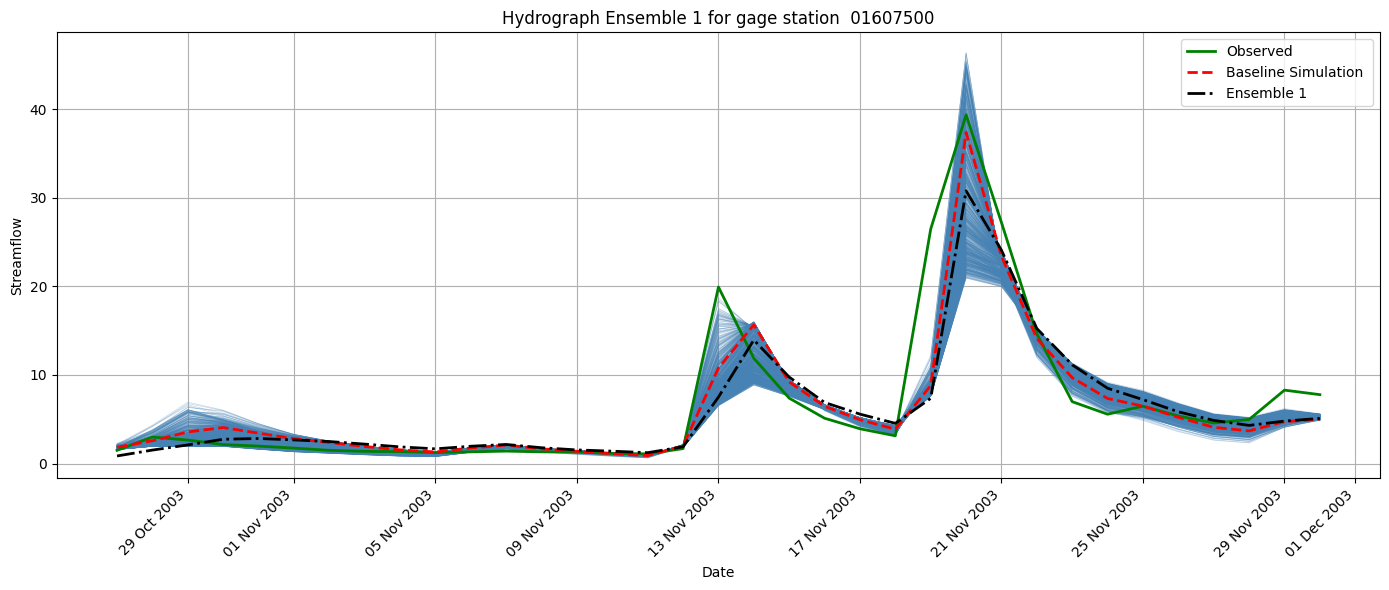

In [54]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01607500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_0_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df2.columns:
    plt.plot(df2.index, df2[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 1 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 1 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble1_01607500.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 1: 01608000

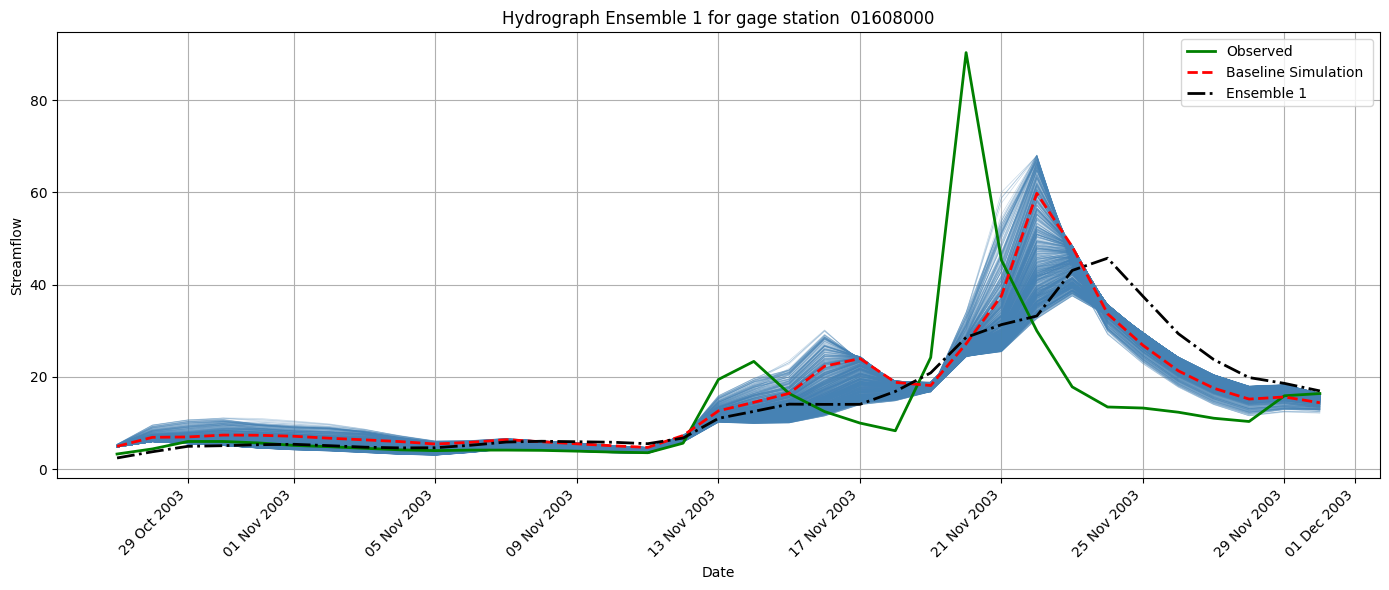

In [55]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01608000"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_0_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df2.columns:
    plt.plot(df2.index, df2[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 1 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 1 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble1_01608000.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 1: 01608500

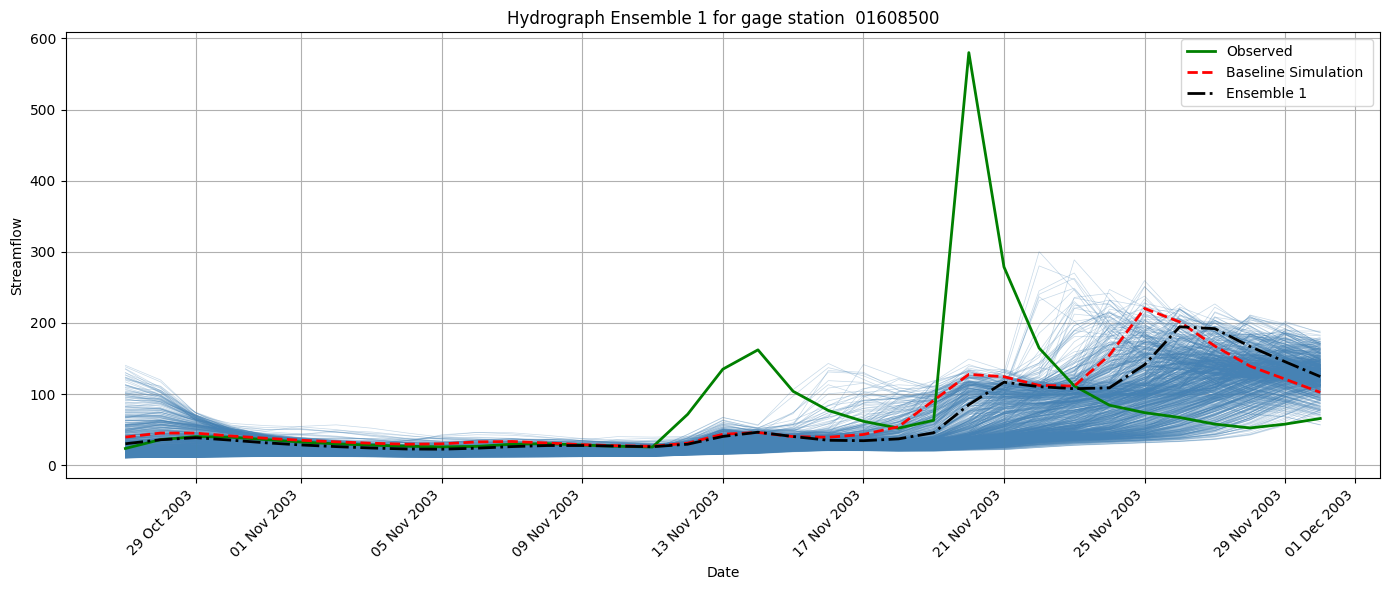

In [56]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01608500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_0_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df2.columns:
    plt.plot(df2.index, df2[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 1 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 1 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble1_01608500.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 2: 01605500

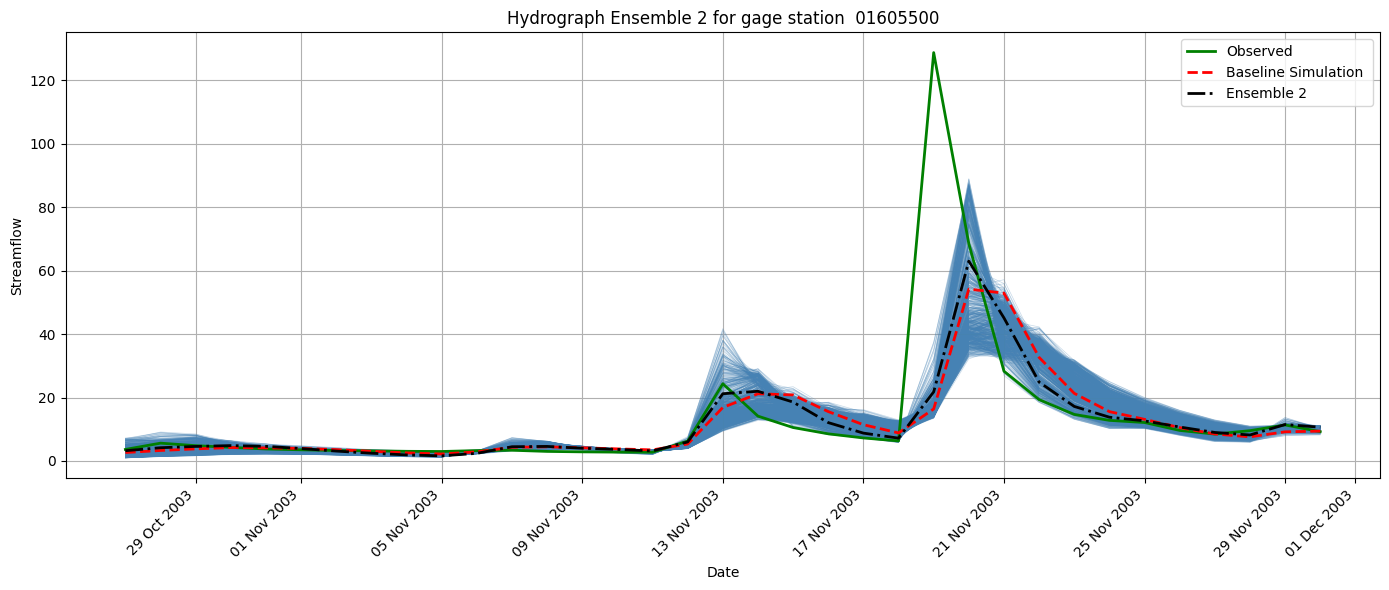

In [57]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01605500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_1_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df4.columns:
    plt.plot(df4.index, df4[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 2 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 2 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble2_01605500.png', dpi=300, bbox_inches='tight')

plt.show() 


## Hydrograph Ensemble 2: 01606000

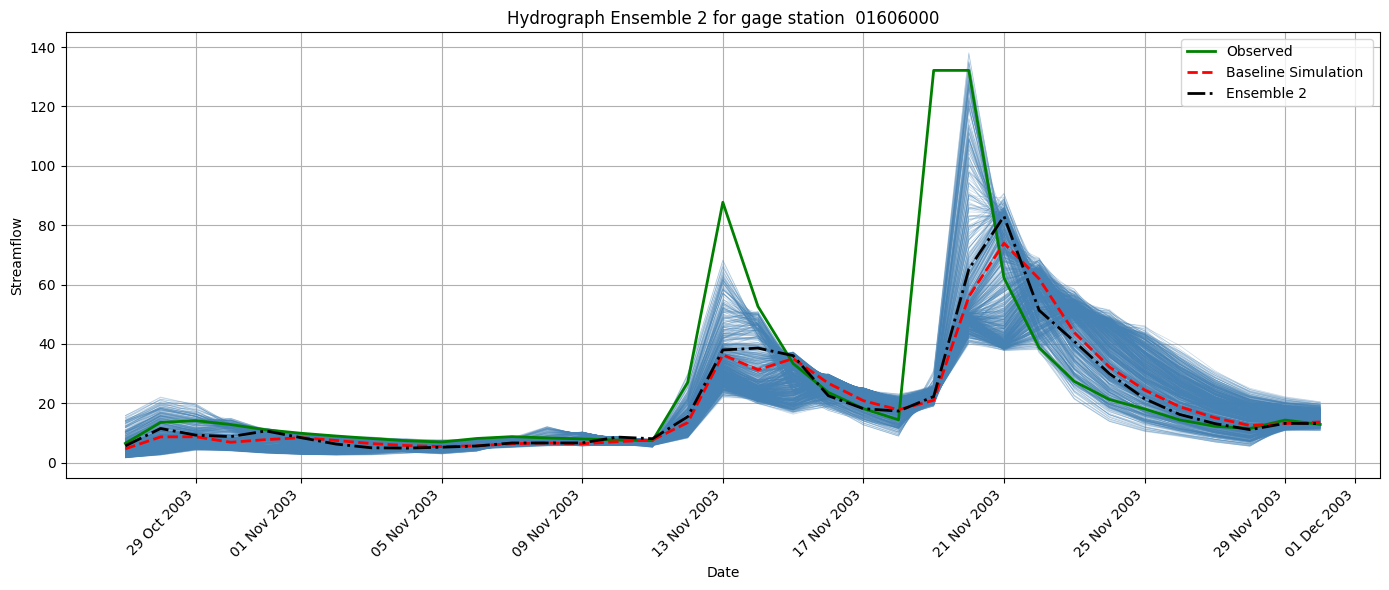

In [58]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01606000"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_1_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 1 
if station_id in df4.columns:
    plt.plot(df4.index, df4[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 2 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 2 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble2_01606000.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 2 : 01606500

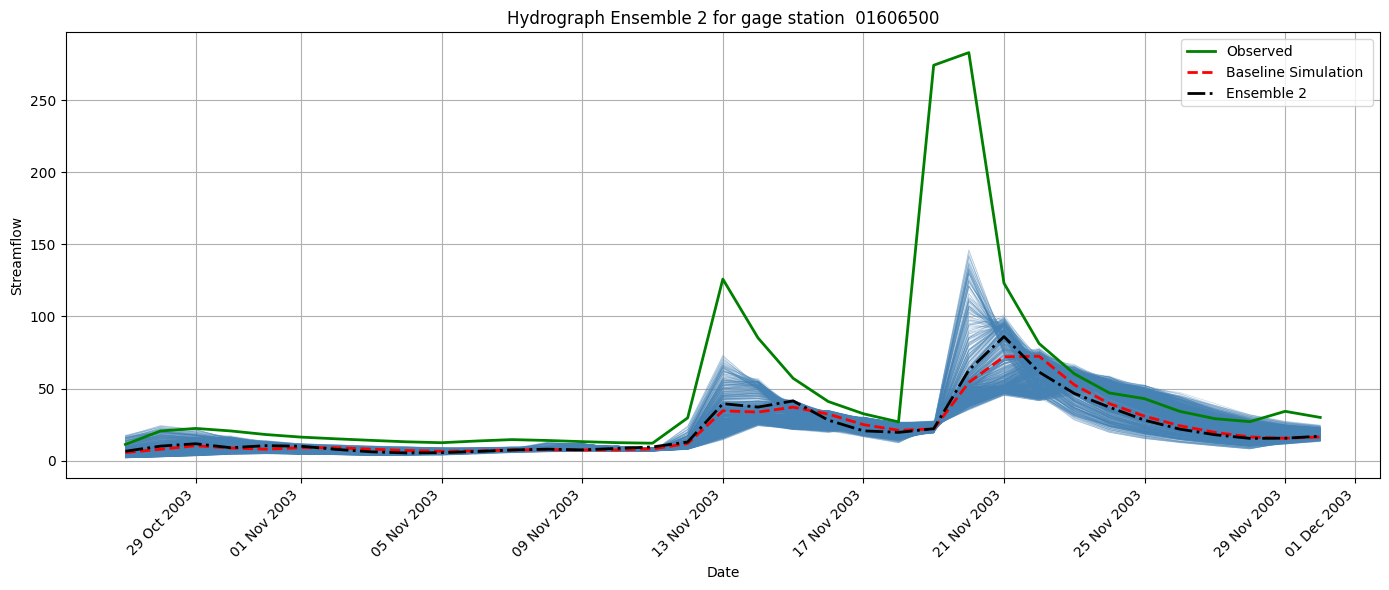

In [59]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01606500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_1_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 2 
if station_id in df4.columns:
    plt.plot(df4.index, df4[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 2 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 2 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble2_01606500.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 2: 01607500

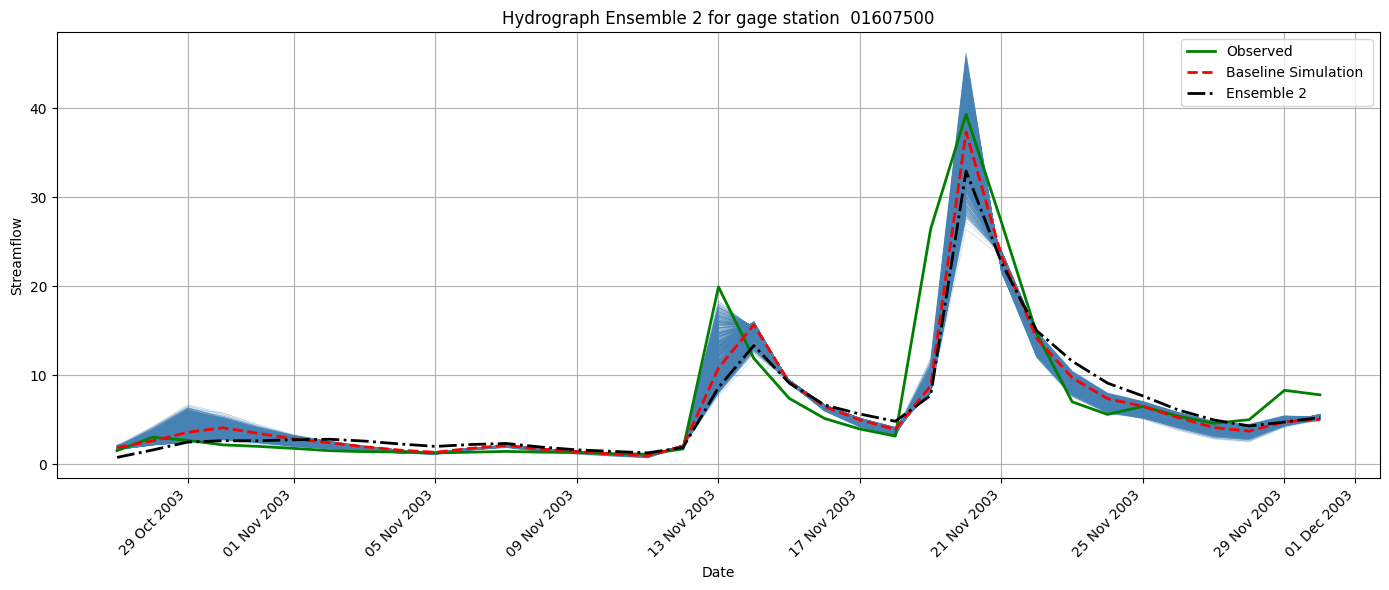

In [60]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01607500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_1_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 2 
if station_id in df4.columns:
    plt.plot(df4.index, df4[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 2 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 2 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)


# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble2_01607500.png', dpi=300, bbox_inches='tight')

plt.show()



## Hydrograph Ensemble 2: 01608000

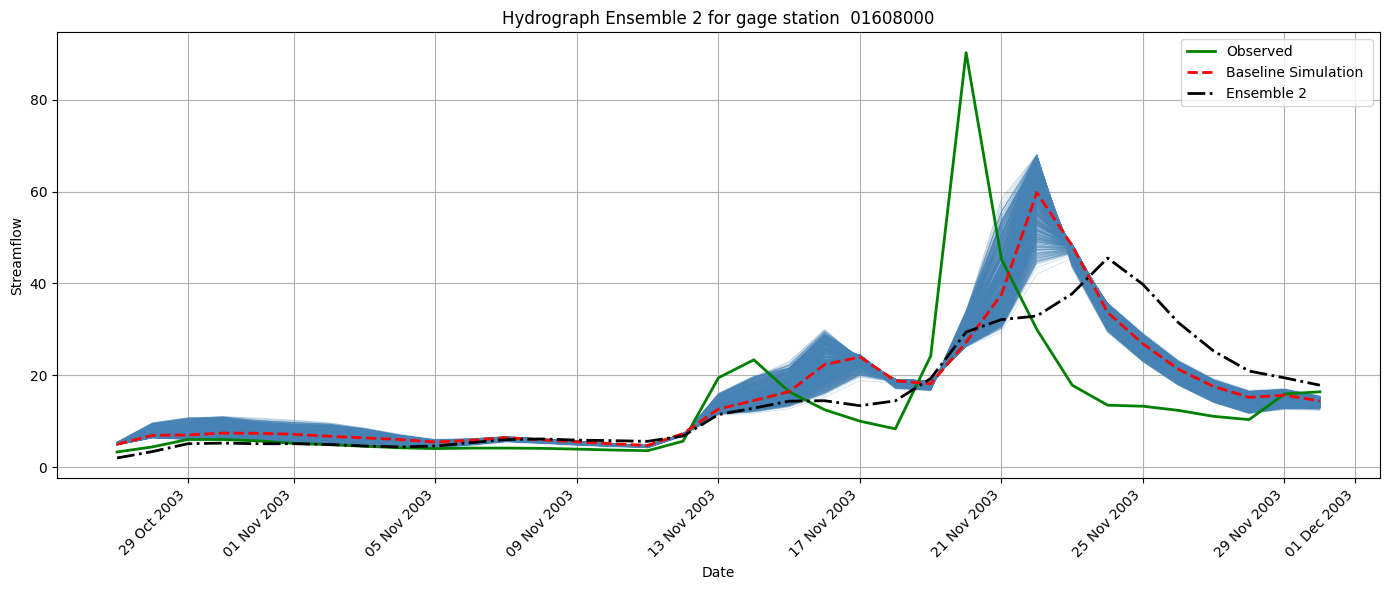

In [61]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01608000"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_1_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 2 
if station_id in df4.columns:
    plt.plot(df4.index, df4[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 2 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 2 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble2_01608000.png', dpi=300, bbox_inches='tight')

plt.show()


## Hydrograph Ensemble 2 : 01608500

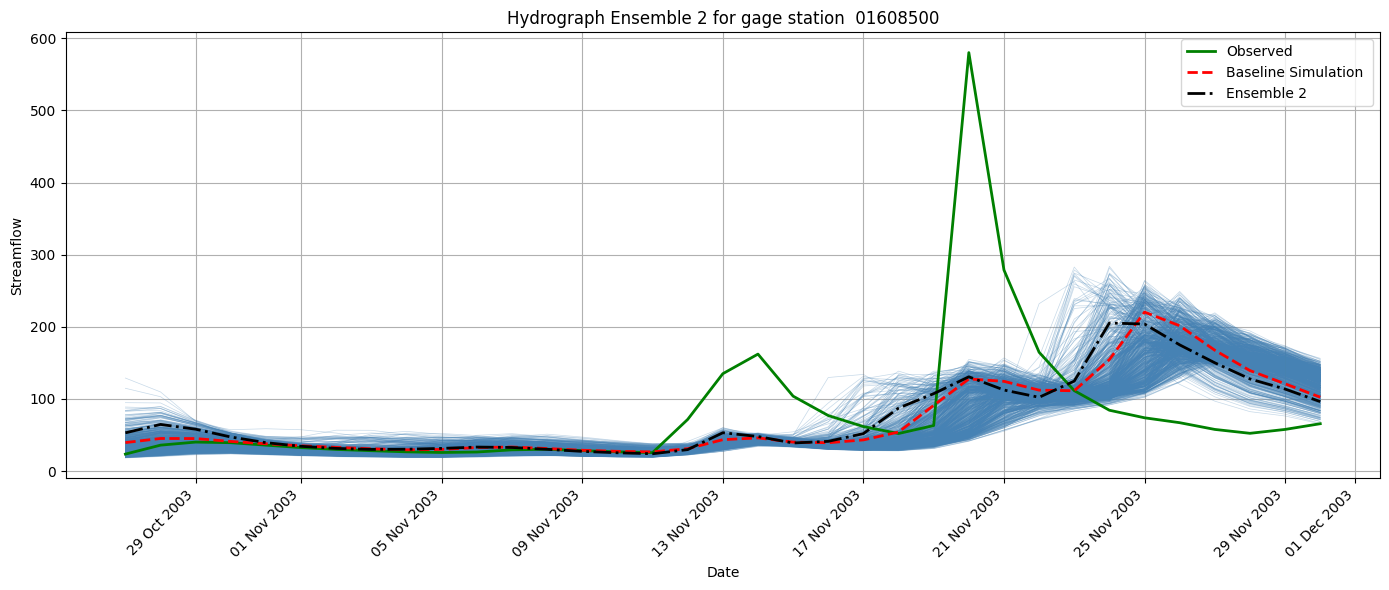

In [62]:
# Import The Libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Base Directory and Station_ id
base_dir = "/home/ms6730/mannings_observations_true_value_020700001_prior_distribution_calibrated/sbi_framework/outputs"
station_id = "01608500"

# Initialize an array to store the streamflow ensemble 
streamflow_ensemble = []
dates = None

# Loop over the 800 simulations
for i in range(800):
    folder = os.path.join(base_dir, f"sinnemahoning_1_{i}")
    file_path = os.path.join(folder, "streamflow_daily_pfsim.csv")
    df = pd.read_csv(file_path)
    streamflow_ensemble.append(df[station_id].values)
    dates = pd.to_datetime(df["date"])
    

# Convert to numpy array
streamflow_array = np.array(streamflow_ensemble)

# Load the observed data and the baseline simulation
df_obs = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_df.csv"))
df_base = pd.read_csv(os.path.join(base_dir, "sinnemahoning", "streamflow_daily_pfsim.csv"))

# Convert date columns in the baseline simulation and the observed data 
dates_obs = pd.to_datetime(df_obs["date"])
dates_base = pd.to_datetime(df_base["date"])

# Plot All Simulations
plt.figure(figsize=(14, 6))

# Plot 800-member ensemble
for i in range(streamflow_array.shape[0]):
    plt.plot(dates, streamflow_array[i], color='steelblue', linewidth=0.5, alpha=0.3, label='_nolegend_')

# Plot observed
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed', zorder=10)

# Plot baseline
plt.plot(dates_base, df_base[station_id], color='red', linestyle='--', linewidth=2, label='Baseline Simulation ', zorder=10)

# Plot ensemble 2 
if station_id in df4.columns:
    plt.plot(df4.index, df4[station_id], color='black', linewidth=2, linestyle='-.', label='Ensemble 2 ', zorder=10)


# Labels and Title 
plt.title(f"Hydrograph Ensemble 2 for gage station  {station_id}")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the figure
plt.savefig('/home/ms6730/results_SBI_02070001_observed_hydrodata/discussion_plots/Hydrograph_Ensemble2_01608500.png', dpi=300, bbox_inches='tight')

plt.show()


## Proportion of Manning's Value at each Gage Station 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_mannings is a 2D numpy array of integers (0 to 8)
rows, cols = new_mannings.shape
category_labels = [f'M{i}' for i in range(9)]

fig, ax = plt.subplots(figsize=(cols/5, rows/5))  # Adjust figsize as needed

# Draw the grid lines
for i in range(rows + 1):
    ax.axhline(i, color='black', linewidth=0.5)
for j in range(cols + 1):
    ax.axvline(j, color='black', linewidth=0.5)

# Add Manning's category labels (e.g., M0, M1...) in each cell
for i in range(rows):
    for j in range(cols):
        category = int(new_mannings[i, j])
        label = category_labels[category]
        ax.text(j + 0.5, i + 0.5, label, va='center', ha='center', fontsize=6)

# Add gage station scatter points
domain_i = [63, 48, 30, 27, 33, 26]  # row indices (i)
domain_j = [130, 73, 70, 69, 29, 30] # column indices (j)

ax.scatter(
    x=[j + 0.5 for j in domain_j],  # Shift to center of the cell
    y=[i + 0.5 for i in domain_i],
    color='red',
    s=100,
    edgecolors='black',
    marker='o',
    label='Gage Station',
    zorder=10
)

# Set plot limits and axis behavior
ax.set_xlim(0, cols)
ax.set_ylim(rows, 0)  # Invert y-axis to match array indexing
ax.set_xticks(np.arange(cols) + 0.5)
ax.set_yticks(np.arange(rows) + 0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0)

# Add title and legend
plt.title("Grid Showing Manning's Category per Cell with Gage Stations", fontsize=10)
ax.legend(loc='upper right', fontsize=6)

plt.tight_layout()
plt.show()
